In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("handwritten_data_785.csv")
type(df)

pandas.core.frame.DataFrame

In [3]:
arr = np.array(df)
data = arr[:, 1:] / 255
target = arr[:, 0]

In [4]:
# input = keras.layers.Input(shape=[784])
# hidden1 = keras.layers.Dense(300, activation=keras.activations.relu)(input)
# hidden2 = keras.layers.Dense(100, activation=keras.activations.relu)(hidden1)
# output = keras.layers.Dense(26, activation=keras.activations.softmax)(hidden2)
# model = keras.Model(inputs = input, outputs = output)

# model.compile(loss = keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.SGD(), metrics = keras.metrics.Accuracy())

XTrainFull, XTest, yTrainFull, yTest = train_test_split(data, target)
XTrain, XValid, yTrain, yValid = train_test_split(XTrainFull, yTrainFull)

In [5]:
# Build a simple mlp model
input = keras.layers.Input(shape=[784])
hidden1 = keras.layers.Dense(300, activation=keras.activations.relu)(input)
hidden2 = keras.layers.Dense(100, activation=keras.activations.relu)(hidden1)
output = keras.layers.Dense(26, activation=keras.activations.softmax)(hidden2)
model = keras.Model(inputs=input, outputs=output)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(),
    metrics=["accuracy"],
)

history = model.fit(XTrain, yTrain, epochs=30, validation_data=(XValid, yValid))

Epoch 1/30
6540/6540 [==============================] - 19s 3ms/step - loss: 0.7245 - accuracy: 0.8089 - val_loss: 0.4348 - val_accuracy: 0.8837
Epoch 2/30
6540/6540 [==============================] - 14s 2ms/step - loss: 0.3673 - accuracy: 0.9032 - val_loss: 0.3099 - val_accuracy: 0.9189
Epoch 3/30
6540/6540 [==============================] - 15s 2ms/step - loss: 0.2729 - accuracy: 0.9281 - val_loss: 0.2454 - val_accuracy: 0.9344
Epoch 4/30
6540/6540 [==============================] - 17s 3ms/step - loss: 0.2219 - accuracy: 0.9422 - val_loss: 0.2096 - val_accuracy: 0.9448
Epoch 5/30
6540/6540 [==============================] - 17s 3ms/step - loss: 0.1902 - accuracy: 0.9502 - val_loss: 0.1857 - val_accuracy: 0.9502
Epoch 6/30
6540/6540 [==============================] - 15s 2ms/step - loss: 0.1682 - accuracy: 0.9561 - val_loss: 0.1766 - val_accuracy: 0.9523
Epoch 7/30
6540/6540 [==============================] - 15s 2ms/step - loss: 0.1510 - accuracy: 0.9608 - val_loss: 0.1582 - val_ac

In [6]:
yPred = model.predict(XTest[:3]).round(2)
print(yPred)
print(
    [
        j
        for i in range(len(yPred))
        for j in range(len(yPred[0]))
        if yPred[i, j] == max(yPred[i])
    ]
)

1/1 [==============================] - 0s 140ms/step
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.98 0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.02]]
[15, 17, 11]


In [7]:
input = keras.layers.Input(shape=[784])
hidden1 = keras.layers.Dense(30, activation=keras.activations.relu)(input)
hidden2 = keras.layers.Dense(10, activation=keras.activations.relu)(hidden1)
output = keras.layers.Dense(26, activation=keras.activations.softmax)(hidden2)
model1 = keras.Model(inputs=input, outputs=output)

model1.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(),
    metrics=["accuracy"],
)

history = model1.fit(XTrain, yTrain, epochs=30, validation_data=(XValid, yValid))

Epoch 1/30
6540/6540 [==============================] - 13s 2ms/step - loss: 1.3086 - accuracy: 0.6304 - val_loss: 0.7510 - val_accuracy: 0.7918
Epoch 2/30
6540/6540 [==============================] - 10s 2ms/step - loss: 0.6402 - accuracy: 0.8248 - val_loss: 0.5624 - val_accuracy: 0.8497
Epoch 3/30
6540/6540 [==============================] - 10s 2ms/step - loss: 0.5141 - accuracy: 0.8613 - val_loss: 0.4686 - val_accuracy: 0.8735
Epoch 4/30
6540/6540 [==============================] - 11s 2ms/step - loss: 0.4391 - accuracy: 0.8833 - val_loss: 0.4060 - val_accuracy: 0.8917
Epoch 5/30
6540/6540 [==============================] - 11s 2ms/step - loss: 0.3879 - accuracy: 0.8980 - val_loss: 0.3691 - val_accuracy: 0.8993
Epoch 6/30
6540/6540 [==============================] - 10s 1ms/step - loss: 0.3544 - accuracy: 0.9064 - val_loss: 0.3414 - val_accuracy: 0.9090
Epoch 7/30
6540/6540 [==============================] - 10s 1ms/step - loss: 0.3301 - accuracy: 0.9128 - val_loss: 0.3232 - val_ac

In [8]:
yPred = model1.predict(XTest[:3])
print(
    [
        j
        for i in range(len(yPred))
        for j in range(len(yPred[0]))
        if yPred[i, j] == max(yPred[i])
    ]
)
print(yTest[:3])

1/1 [==============================] - 0s 106ms/step
[15, 17, 11]
[15 17 11]


In [13]:
pca = PCA(n_components=80)
pca.fit(XTrain)
variance = pca.explained_variance_
# pd.DataFrame(variance).to_csv('Explained_variance.csv')

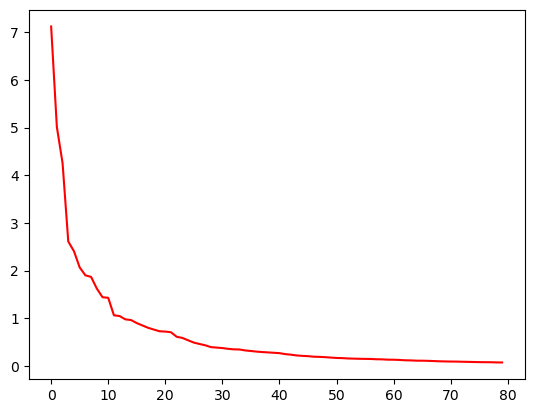

In [14]:
plt.plot(variance, "r-")

In [15]:
components = pca.components_
components.shape

(80, 784)

In [16]:
XTrainTransformed = pca.transform(XTrain)
XValidTransformed = pca.transform(XValid)
XTestTransformed = pca.transform(XTest)

In [19]:
# XTrain = np.matmul(components, XTrain.T-np.mean(XTrain.T))
# XValid = np.matmul(components, XValid.T-np.mean(XValid.T))
# XTest = np.matmul(components, XTest.T-np.mean(XTest.T))

np.cov(XTest)

MemoryError: Unable to allocate 64.5 GiB for an array with shape (93010, 93010) and data type float64

In [21]:
# XTrain = XTrain.T
# XValid = XValid.T
# XTest = XTest.T

# print(XTrain.shape, XValid.shape, XTest.shape)
# np.cov(components)

(209270, 400) (69757, 400) (93010, 400)


array([[ 9.94196815e-04, -6.53897522e-06, -9.06861064e-05, ...,
         4.70849494e-07, -4.46724529e-06,  3.64066039e-06],
       [-6.53897522e-06,  1.27698809e-03, -2.09581250e-06, ...,
         1.08816256e-08, -1.03240826e-07,  8.41379331e-08],
       [-9.06861064e-05, -2.09581250e-06,  1.24807333e-03, ...,
         1.50912371e-07, -1.43180058e-06,  1.16687115e-06],
       ...,
       [ 4.70849494e-07,  1.08816256e-08,  1.50912371e-07, ...,
         1.27713842e-03,  7.43402275e-09, -6.05848805e-09],
       [-4.46724529e-06, -1.03240826e-07, -1.43180058e-06, ...,
         7.43402275e-09,  1.27706868e-03,  5.74806865e-08],
       [ 3.64066039e-06,  8.41379331e-08,  1.16687115e-06, ...,
        -6.05848805e-09,  5.74806865e-08,  1.27709236e-03]])

In [20]:
input = keras.layers.Input(shape=[80])
hidden1 = keras.layers.Dense(300, activation=keras.activations.relu)(input)
hidden2 = keras.layers.Dense(100, activation=keras.activations.relu)(hidden1)
output = keras.layers.Dense(26, activation=keras.activations.softmax)(hidden2)
modelWithPca = keras.Model(inputs=input, outputs=output)

modelWithPca.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(),
    metrics=["accuracy"],
)
history = modelWithPca.fit(XTrainTransformed, yTrain, epochs=35, validation_data=(XValidTransformed, yValid))

Epoch 1/35
6540/6540 [==============================] - 12s 2ms/step - loss: 0.6872 - accuracy: 0.8179 - val_loss: 0.3668 - val_accuracy: 0.9012
Epoch 2/35
6540/6540 [==============================] - 13s 2ms/step - loss: 0.3016 - accuracy: 0.9195 - val_loss: 0.2645 - val_accuracy: 0.9295
Epoch 3/35
6540/6540 [==============================] - 10s 2ms/step - loss: 0.2296 - accuracy: 0.9391 - val_loss: 0.2172 - val_accuracy: 0.9426
Epoch 4/35
6540/6540 [==============================] - 13s 2ms/step - loss: 0.1910 - accuracy: 0.9490 - val_loss: 0.1907 - val_accuracy: 0.9491
Epoch 5/35
6540/6540 [==============================] - 13s 2ms/step - loss: 0.1663 - accuracy: 0.9558 - val_loss: 0.1700 - val_accuracy: 0.9547
Epoch 6/35
6540/6540 [==============================] - 10s 2ms/step - loss: 0.1487 - accuracy: 0.9605 - val_loss: 0.1564 - val_accuracy: 0.9590
Epoch 7/35
6540/6540 [==============================] - 10s 2ms/step - loss: 0.1355 - accuracy: 0.9645 - val_loss: 0.1463 - val_ac

In [22]:
modelWithPca.evaluate(XTestTransformed, yTest)

2907/2907 [==============================] - 3s 1ms/step - loss: 0.0883 - accuracy: 0.9777


[0.08834906667470932, 0.9776583313941956]

In [16]:
input = keras.layers.Input(shape=[400])
hidden1 = keras.layers.Dense(30, activation=keras.activations.relu)(input)
hidden2 = keras.layers.Dense(30, activation=keras.activations.relu)(hidden1)
hidden3 = keras.layers.Dense(10, activation=keras.activations.relu)(hidden2)
output = keras.layers.Dense(26, activation=keras.activations.softmax)(hidden3)
modelWithPca = keras.Model(inputs=input, outputs=output)

modelWithPca.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(),
    metrics=["accuracy"],
)
history = modelWithPca.fit(XTrain, yTrain, epochs=30, validation_data=(XValid, yValid))

Epoch 1/30
6540/6540 [==============================] - 10s 2ms/step - loss: 1.3012 - accuracy: 0.6267 - val_loss: 0.7859 - val_accuracy: 0.7755
Epoch 2/30
6540/6540 [==============================] - 9s 1ms/step - loss: 0.6508 - accuracy: 0.8194 - val_loss: 0.5455 - val_accuracy: 0.8488
Epoch 3/30
6540/6540 [==============================] - 9s 1ms/step - loss: 0.4921 - accuracy: 0.8663 - val_loss: 0.4839 - val_accuracy: 0.8664
Epoch 4/30
6540/6540 [==============================] - 9s 1ms/step - loss: 0.4180 - accuracy: 0.8863 - val_loss: 0.3861 - val_accuracy: 0.8970
Epoch 5/30
6540/6540 [==============================] - 11s 2ms/step - loss: 0.3740 - accuracy: 0.8993 - val_loss: 0.3713 - val_accuracy: 0.8995
Epoch 6/30
6540/6540 [==============================] - 9s 1ms/step - loss: 0.3457 - accuracy: 0.9078 - val_loss: 0.3435 - val_accuracy: 0.9093
Epoch 7/30
6540/6540 [==============================] - 9s 1ms/step - loss: 0.3246 - accuracy: 0.9137 - val_loss: 0.3176 - val_accurac

In [17]:
modelWithPca.evaluate(XTest, yTest)

2907/2907 [==============================] - 3s 985us/step - loss: 0.2315 - accuracy: 0.9397


[0.2315283566713333, 0.9397376775741577]

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=25)

XTrainLda = lda.fit_transform(XTrain, yTrain)
XValidLda = lda.transform(XValid)
XTestLda = lda.transform(XTest)

input = keras.layers.Input(shape=[25])
hidden1 = keras.layers.Dense(300, activation=keras.activations.relu)(input)
hidden2 = keras.layers.Dense(100, activation=keras.activations.relu)(hidden1)
output = keras.layers.Dense(26, activation=keras.activations.softmax)(hidden2)
modelWithLda = keras.Model(inputs=input, outputs=output)

modelWithLda.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(),
    metrics=["accuracy"],
)

history = modelWithLda.fit(XTrainLda, yTrain, epochs=30, validation_data=(XValidLda, yValid))

modelWithLda.evaluate(XTestLda, yTest)

Epoch 1/30
6540/6540 [==============================] - 11s 2ms/step - loss: 0.7075 - accuracy: 0.8127 - val_loss: 0.4688 - val_accuracy: 0.8693
Epoch 2/30
6540/6540 [==============================] - 10s 2ms/step - loss: 0.4023 - accuracy: 0.8873 - val_loss: 0.3714 - val_accuracy: 0.8956
Epoch 3/30
6540/6540 [==============================] - 11s 2ms/step - loss: 0.3295 - accuracy: 0.9078 - val_loss: 0.3154 - val_accuracy: 0.9101
Epoch 4/30
6540/6540 [==============================] - 10s 2ms/step - loss: 0.2878 - accuracy: 0.9190 - val_loss: 0.2846 - val_accuracy: 0.9195
Epoch 5/30
6540/6540 [==============================] - 10s 2ms/step - loss: 0.2610 - accuracy: 0.9268 - val_loss: 0.2632 - val_accuracy: 0.9251
Epoch 6/30
6540/6540 [==============================] - 10s 2ms/step - loss: 0.2428 - accuracy: 0.9321 - val_loss: 0.2498 - val_accuracy: 0.9283
Epoch 7/30
6540/6540 [==============================] - 10s 2ms/step - loss: 0.2289 - accuracy: 0.9352 - val_loss: 0.2387 - val_ac

[0.17992699146270752, 0.9491667747497559]